In [10]:
from drought.data.pipeline import *
from sklearn.cluster import KMeans
from shapely import Polygon
import pickle
import numpy as np

<b> Initial Clustering Attempt Using PAI and Climatic Data </b>

Ignore this for now - we discussed it last week

In [6]:
shape = get_gpd_polygons()

In [9]:
monthly = get_monthly_means_per_polygon()
cluster_input = monthly.groupby(["polygon_id"]).mean()
cluster_input

,month,year,pai,precipitation,temperature,radiation
polygon_id,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07


In [194]:
def ecosystem_clustering(df, feature_cols):
    km = KMeans(n_clusters=2)
    km.fit(df[feature_cols])
    output = df.assign(cluster=km.predict(df[feature_cols]))

    return output

In [19]:
result = ecosystem_clustering(cluster_input, ["temperature", "precipitation", "radiation", "pai"])
result

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,month,year,pai,precipitation,temperature,radiation,cluster
polygon_id,,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07,0
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07,0
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07,0
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07,2
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07,3
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07,1
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07,1
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07,2


In [20]:
shape = shape.set_index(result.index)
shape = shape.assign(cluster = result["cluster"])

<AxesSubplot: >

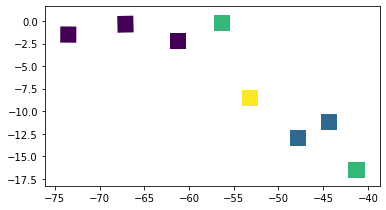

In [21]:
shape.plot(column = shape["cluster"])

<h1> Rasterisation! </h1>

<b> Import GEDI Footprints </b>

In [7]:
gedi_csv = get_gedi_footprints()

In [8]:
gedi_csv = gedi_csv[gedi_csv["pai"] > -9000]
gedi_csv

,pai,l2b_quality_flag,shot_number,lon_lowestmode,lat_lowestmode,geometry,year,month,polygon_id,polygon_spei
90,3.270860,1,20420500100053124,-73.012176,-2.148434,POINT (-73.01217550938594 -2.148433601199582),2019,4,1,Y
92,0.226100,1,20420500100053126,-73.011580,-2.147593,POINT (-73.01158014712219 -2.147592765811703),2019,4,1,Y
104,0.796234,1,20420500100053090,-73.022286,-2.162795,POINT (-73.02228628616268 -2.162794720210879),2019,4,1,Y
111,1.732929,1,21490600100274710,-72.754148,-1.163992,POINT (-72.7541482465911 -1.1639923700881025),2019,4,1,Y
112,1.270815,1,21490600100274708,-72.754743,-1.164835,POINT (-72.75474328953197 -1.1648345603875192),2019,4,1,Y
...,...,...,...,...,...,...,...,...,...,...
21569,4.859155,1,197430800400540965,-40.901799,-16.097564,POINT (-40.901798503505084 -16.09756415167545),2022,6,8,N
21570,2.089660,1,197430800400540966,-40.901472,-16.097975,POINT (-40.90147238514139 -16.09797536938862),2022,6,8,N
21571,2.213748,1,197430800400540967,-40.901166,-16.098368,POINT (-40.90116615300125 -16.098367597271835),2022,6,8,N
21572,0.108898,1,197430800400540968,-40.900845,-16.098774,POINT (-40.90084514219941 -16.098773842809226),2022,6,8,N


In [35]:
shape.geometry.bounds

,minx,miny,maxx,maxy
0,-74.416441,-2.412584,-72.602802,-0.605941
1,-68.035983,-1.306142,-66.197392,0.584974
2,-62.180343,-3.150466,-60.383712,-1.355298
3,-57.209042,-1.094028,-55.412411,0.702519
4,-54.088527,-9.368769,-52.291897,-7.591857
5,-48.750560,-13.786351,-46.953929,-12.035216
6,-45.257066,-12.098650,-43.460435,-10.336418
7,-42.170125,-17.343441,-40.373495,-15.620713


<b> Create Rasterized Grid with Footprints Matched to Cells</b>

rasterise_polygon generates a r x r grid (as a 2D list) and then assigns every footprint to the appropriate cell. The end result is a 2D list of DataFrames. Interestingly higher resolution grids are generated faster, since the individual dataframes for each cell are smaller and pd.concat becomes slower with larger dataframe sizes.

In [53]:
def rasterise_polygon(r, df, shape, polygon):

    df = df[df["polygon_id"] == polygon]
    geometry = shape.geometry[polygon - 1]

    grid = [[pd.DataFrame()]*r for i in range(r)]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    for i in range(len(df)):
        footprint = df.iloc[[i]]
        lon = footprint["lon_lowestmode"]
        lat = footprint["lat_lowestmode"]
        x = floor((lon - minx) / stepx) 
        y = floor((maxy - lat) / stepy)
        grid[y][x] = pd.concat([grid[y][x], footprint])
        if (i%100000==0):
            print(i)

    return grid

In [135]:
grid_10 = rasterise_polygon(10, gedi_csv, shape, 1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


<b> Create Shapely Polygons for Each Grid Cell </b>

Encodes geospatial information for every cell for convenient plotting.

In [13]:
def grid_cells(r, shape, polygon):

    geometry = shape.geometry[polygon - 1]
    
    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    curx = minx
    cury = maxy

    cells = []

    for y in range(r):
        for x in range(r):
            cell = Polygon([(curx, cury), (curx + stepx, cury), (curx + stepx, cury - stepy), (curx, cury - stepy)])
            cells.append(cell)
            curx += stepx
        cury -= stepy
        curx = minx

    cells = gpd.GeoDataFrame(cells, columns = ["geometry"])
    
    return cells

In [136]:
cells = grid_cells(10, shape, 1)

<b> Plot Means of Selected Variable </b>

Combines spatial information from grid_cells with footprints from rasterise_polygon to plot means by cell of a given variable.

In [12]:
def plot_raster(r, grid, cells, var):

    means = []

    for y in range(r):
        for x in range(r):
            means.append(grid[y][x][var].mean())

    cells[var] = means

    cells.plot(column = var, cmap = "Greens")

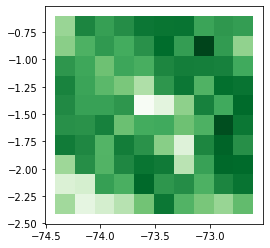

In [138]:
plot_raster(10, grid_10, cells, "pai")

This is just getting 10 x 10 rasterised grids of all the other polygons.

In [141]:
grid_10_p1 = grid_10
grid_10_p2 = rasterise_polygon(10, gedi_csv, shape, 2)
grid_10_p3 = rasterise_polygon(10, gedi_csv, shape, 3)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000


In [145]:
grid_10_p4 = rasterise_polygon(10, gedi_csv, shape, 4)
grid_10_p5 = rasterise_polygon(10, gedi_csv, shape, 5)
grid_10_p6 = rasterise_polygon(10, gedi_csv, shape, 6)
grid_10_p7 = rasterise_polygon(10, gedi_csv, shape, 7)
grid_10_p8 = rasterise_polygon(10, gedi_csv, shape, 8)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000


Noticed that P1 and P3 still have -9999 PAI values - might be worth dealing with this in the database itself

In [157]:
for i in range(10):
    for j in range(10):
        grid_10_p1[i][j] = grid_10_p1[i][j][grid_10_p1][i][j]["pai"] > -9000]

for i in range(10):
    for j in range(10):
        grid_10_p3[i][j] = grid_10_p3[i][j][grid_10_p3][i][j]["pai"] > -9000]

<b> Saving 10 x 10 Grids (very inefficiently) </b>

In [165]:
grid_10_all = []

In [167]:
grid_10_all.append(grid_10_p1)
grid_10_all.append(grid_10_p2)
grid_10_all.append(grid_10_p3)
grid_10_all.append(grid_10_p4)
grid_10_all.append(grid_10_p5)
grid_10_all.append(grid_10_p6)
grid_10_all.append(grid_10_p7)
grid_10_all.append(grid_10_p8)

In [180]:
with open("/maps-priv/maps/drought-with-gedi/gedi_data/grid_10", "wb") as fp:
    pickle.dump(grid_10_all, fp)
    fp.close()

In [11]:
with open("/maps-priv/maps/drought-with-gedi/gedi_data/grid_10", "rb") as fp:
    grid_10 = pickle.load(fp)

<b> Plotting All Polygons at Once and Clustering </b>

In [192]:
def plot_raster_all(r, grid, shape, var):

    cells = pd.DataFrame()

    for polygon in range(1,9):
        cells = pd.concat([cells, grid_cells(r, shape, polygon)])

    means = []

    for i in range(8):
        for y in range(r):
            for x in range(r):
                means.append(grid[i][y][x][var].mean())

    cells[var] = means

    cells.plot(column = var, cmap = "Greens")

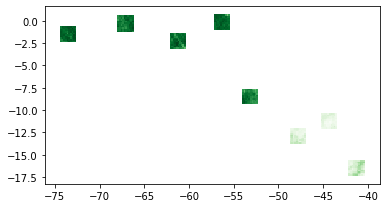

In [193]:
plot_raster_all(10,grid_10,shape,"pai")

In [223]:
def cluster_all(r, grid, shape, var):

    cells = pd.DataFrame()

    for polygon in range(1,9):
        cells = pd.concat([cells, grid_cells(r, shape, polygon)])

    means = []

    for i in range(8):
        for y in range(r):
            for x in range(r):
                means.append(grid[i][y][x][var].mean())

    cells[var] = means

    cells = ecosystem_clustering(cells,[var])

    cells.plot(column = "cluster", legend = True)

    return cells.groupby("cluster").mean()

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_266543/399232658.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return cells.groupby("cluster").mean()


,pai
cluster,
0,3.654263
1,0.710367
2,3.026651


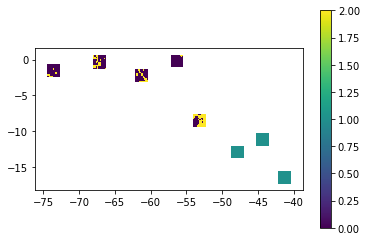

In [224]:
cluster_all(10,grid_10,shape,"pai")

<AxesSubplot: title={'center': 'pai'}, xlabel='polygon_id'>

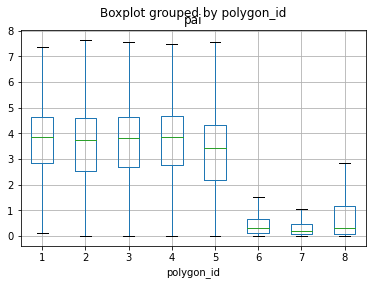

In [226]:
gedi_csv.boxplot(column="pai",by="polygon_id",showfliers=False)

In [ ]:
# Do boxplots of climatic data
# Classify with time series next

In [54]:
grid_100_p1 = rasterise_polygon(100,gedi_csv,shape,1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [55]:
grid_1000_p1 = rasterise_polygon(1000,gedi_csv,shape,1)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


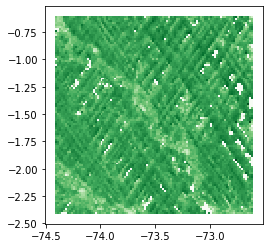

In [76]:
plot_raster(100, grid_100_p1, cells, "pai", pd.DataFrame.mean)

In [77]:
cells = grid_cells(1000, shape, 1)

In [79]:
for y in range(1000):
    for x in range(1000):
        if len(grid_1000_p1[y][x]) != 0:
            grid_1000_p1[y][x] = grid_1000_p1[y][x][grid_1000_p1[y][x]["pai"] > -9000]

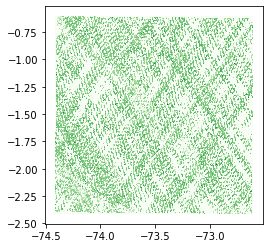

In [80]:
plot_raster(1000, grid_1000_p1, cells, "pai", pd.DataFrame.mean)

<b> Optimising Performance of Rasterisation </b>

In [1]:
def rasterise_polygon(r, df, shape, polygon):

    df = df[df["polygon_id"] == polygon]
    geometry = shape.geometry[polygon - 1]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
    df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)

    return df

In [12]:
test = rasterise_polygon(10,gedi_csv,shape,1)

/tmp/ipykernel_3528150/2766178951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/tmp/ipykernel_3528150/2766178951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)


In [13]:
def calculate_grid_geometry(df, r, shape, polygon, columns_to_keep):
    '''
        Given a Pandas.DataFrame with x and y columns, replace those with the
        appropriate geometry column.
    
    '''
    geometry = shape.geometry[polygon - 1]

    minx, miny, maxx, maxy = geometry.bounds
    stepx = (maxx - minx) / r
    stepy = (maxy - miny) / r

    def calc_geometry(row):
        curx = minx + row['x'] * stepx
        cury = maxy - row['y'] * stepy
        return Polygon([(curx, cury), (curx + stepx, cury), (curx + stepx, cury - stepy), (curx, cury - stepy)])
    
    df['geometry'] = df.apply(calc_geometry, axis=1)
    df = df.drop(columns=['x', 'y'])

    geo_df = gpd.GeoDataFrame(df, columns = ["geometry", *columns_to_keep])
    return geo_df

In [34]:
def raster_plot(df, r, shape, polygon, var):

    df = df.groupby(['x', 'y']).mean()[var].reset_index()
    geo_df = calculate_grid_geometry(df, r, shape, polygon, [var])

    geo_df.plot(column = var, cmap = 'Greens')

/tmp/ipykernel_3528150/4161984148.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['x', 'y']).mean()[var].reset_index()


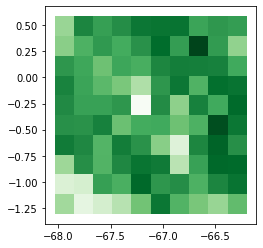

In [35]:
raster_plot(test, 10, shape, 1, 'pai')

In [36]:
from drought.data.rasterisation import *

In [39]:
grid = rasterise_polygon(10, gedi_csv, shape, 1)

/home/og309/drought-with-gedi/drought/data/rasterisation.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = ((df['lon_lowestmode'] - minx) / stepx).apply(np.floor)
/home/og309/drought-with-gedi/drought/data/rasterisation.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = ((maxy - df['lat_lowestmode']) / stepy).apply(np.floor)


/home/og309/drought-with-gedi/drought/data/rasterisation.py:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['x', 'y']).mean()[var].reset_index()


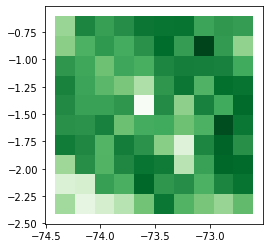

In [40]:
plot_raster(grid, 10, shape, 1, 'pai')